# Salary Prediction of Data Professional
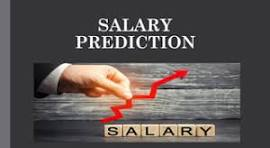

**Notebook Overview**:


This notebook presents a comprehensive analysis and prediction of salaries within the realm of data professions. The primary objective is to leverage machine learning techniques to accurately predict the salaries of data professionals based on various factors such as work experience, job role, employment type, and company characteristics.

The notebook follows a structured approach, covering the following key steps:

1. **Exploratory Data Analysis (EDA):** 📊 The dataset is thoroughly explored to understand the distribution of salaries and other relevant features. Insights are unveiled through data visualization, summary statistics, and identifying correlations between features and the target variable (salary). Relationships between experience, job roles, performance, and salary are also examined.

2. **Feature Engineering:** 🔧 New features are created or existing ones are transformed to provide additional insights or improve model performance. Feature engineering involves deriving features related to experience, job role, and performance to enrich the dataset.

3. **Data Preprocessing:** 🛠️ The data is prepared for model training by handling missing values, encoding categorical variables, and scaling or normalizing features as needed. This step ensures that the data is in a suitable format for machine learning algorithms.

4. **Machine Learning Model Development:** 🤖 Various regression models including linear regression, decision trees, random forests, and gradient boosting are trained to predict salaries. Different algorithms are experimented with to identify the best-performing model.

5. **Model Evaluation:** 📈 The performance of each model is assessed using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. The model that provides the most accurate salary predictions is identified.

6. **ML Pipelines and Model Deployment:** ⚙️ ML pipelines are created to streamline the end-to-end machine learning process, encompassing data preprocessing and model training. Additionally, a model is deployed using frameworks like Flask or FastAPI to generate predictions for unseen data, facilitating practical applications of the developed predictive model.

7. **Recommendations:** 🚀 Based on the findings and insights from the model, actionable recommendations are provided. These recommendations may include factors influencing salaries and potential strategies for improving earnings in data professions.

Overall, this notebook serves as a comprehensive guide to understanding, analyzing, and predicting salaries in the field of data professions, with a focus on leveraging machine learning techniques for actionable insights and practical applications.

# Step1- Exploratory Data Analysis

###  Step 1.1: Load and Inspect the Dataset

In [4]:
import pandas as pd

# Load the dataset (replace 'data.csv' with your actual dataset filename)
data = pd.read_csv('/kaggle/input/salary-prediction-data/salaries.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display information about the dataset (columns, data types, non-null values)
print("\nInformation about the dataset:")
print(data.info())


First few rows of the dataset:
   work_year experience_level employment_type               job_title  salary  \
0       2024               MI              FT          Data Scientist  140000   
1       2024               SE              FT  Statistical Programmer  177000   
2       2024               SE              FT  Statistical Programmer  106200   
3       2024               EN              FT  Statistical Programmer   93500   
4       2024               EN              FT  Statistical Programmer   53300   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         140000                 US           100   
1             USD         177000                 US             0   
2             USD         106200                 US             0   
3             USD          93500                 US             0   
4             USD          53300                 US             0   

  company_location company_size  
0               US            L  

### Step 1.2: Visualize the Distribution of Salaries and Other Relevant Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


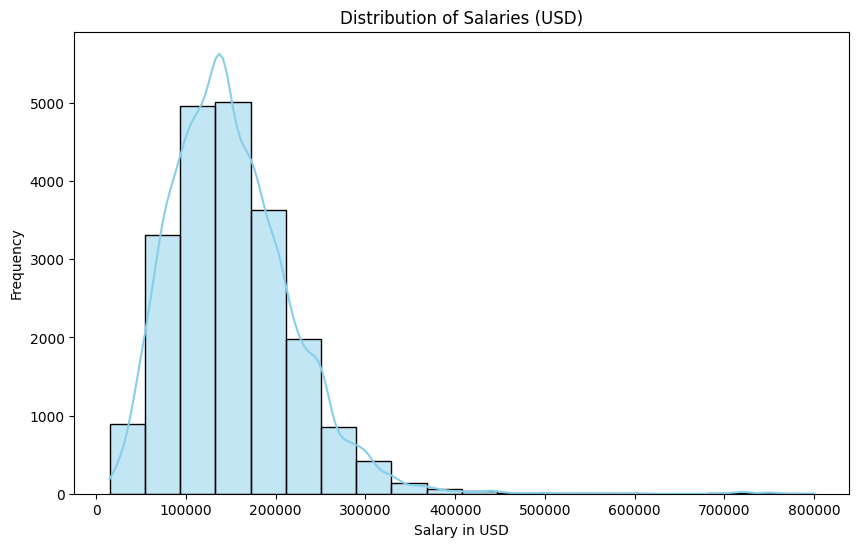

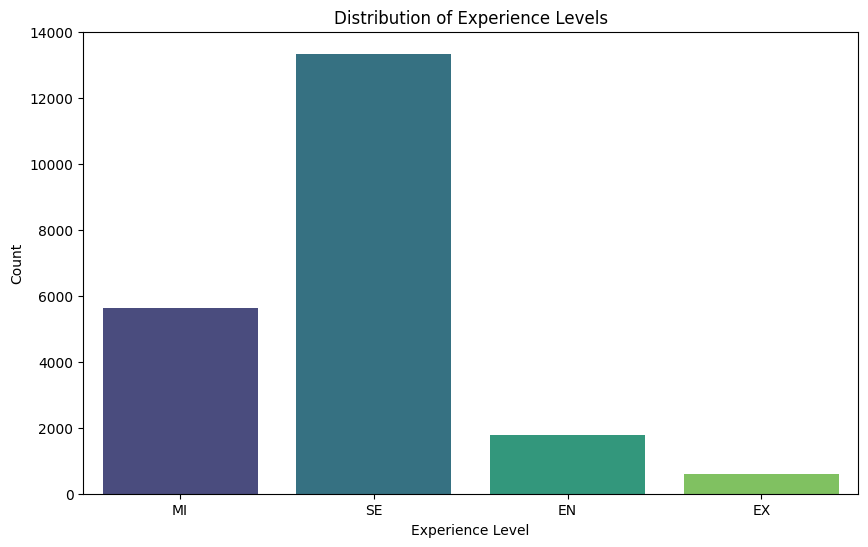

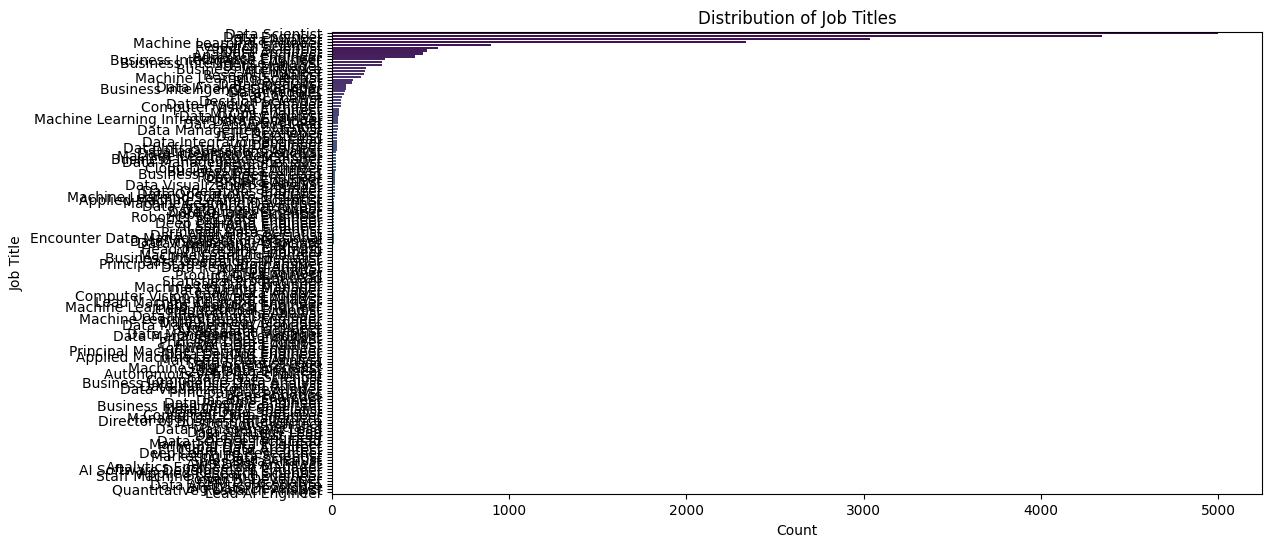

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of salaries using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of years of experience using experience level
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', data=data, palette='viridis')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of job titles
plt.figure(figsize=(12, 6))
sns.countplot(y='job_title', data=data, order=data['job_title'].value_counts().index, palette='viridis')
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


### Step 1.3: Generate Summary Statistics for Numerical and Categorical Variables

In [6]:
# Summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
print(data.describe())

# Summary statistics for categorical variables
print("\nSummary statistics for categorical variables:")
print(data.describe(include=['object']))



Summary statistics for numerical variables:
          work_year        salary  salary_in_usd  remote_ratio
count  21332.000000  2.133200e+04   21332.000000  21332.000000
mean    2023.400572  1.621038e+05  151037.496672     28.942434
std        0.706331  3.017744e+05   68514.378124     45.021178
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.030000e+05  103000.000000      0.000000
50%     2024.000000  1.430000e+05  142200.000000      0.000000
75%     2024.000000  1.900000e+05  190000.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000

Summary statistics for categorical variables:
       experience_level employment_type       job_title salary_currency  \
count             21332           21332           21332           21332   
unique                4               4             159              24   
top                  SE              FT  Data Scientist             USD   
freq              13338           21243  

### Step 1.4: Detect and Visualize Outliers

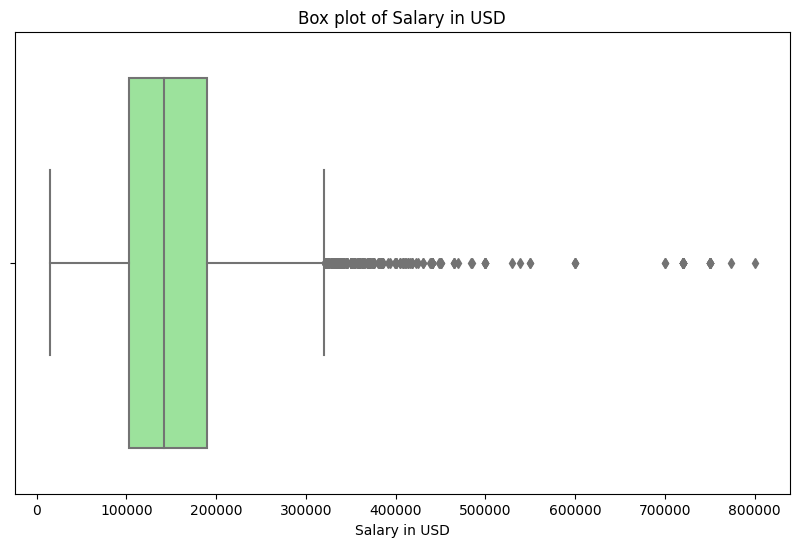

In [8]:
# Visualize outliers using box plots for salary
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['salary_in_usd'], color='lightgreen')
plt.title('Box plot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()


### Step 1.5: Examine the Relationships Between Experience, Job Roles, Performance, and Salary

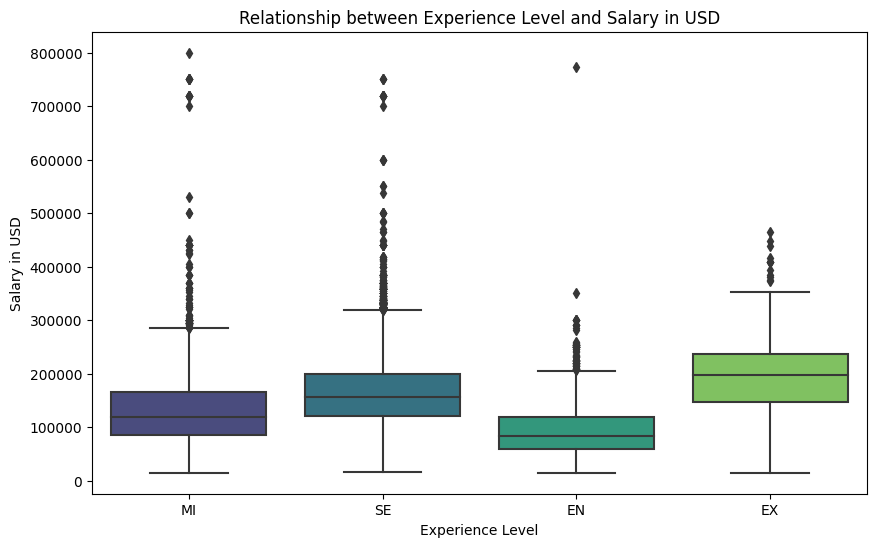

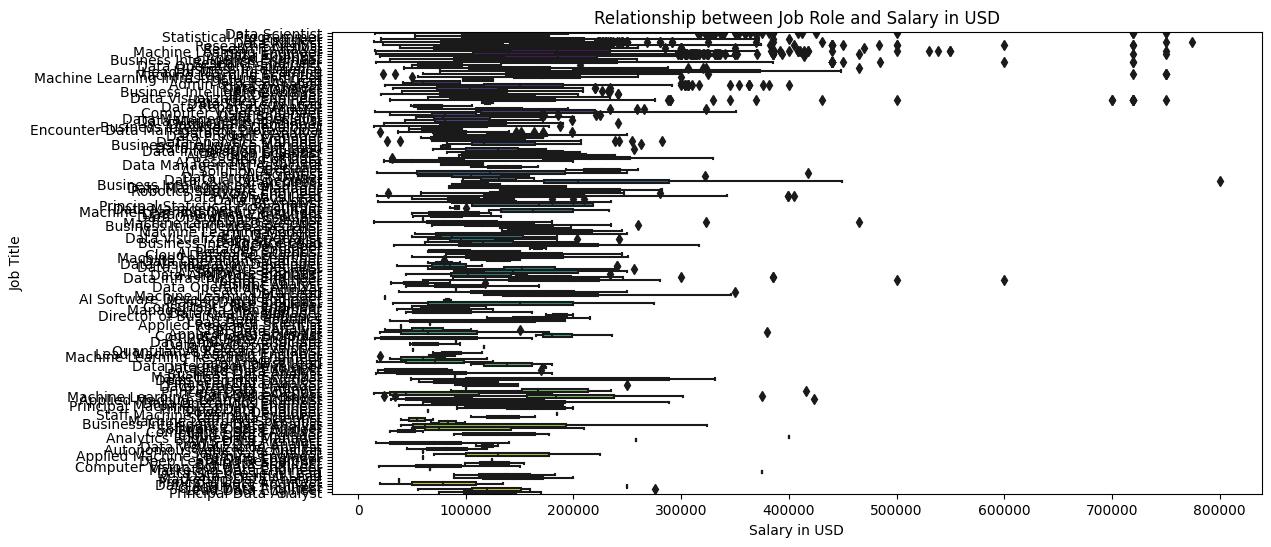

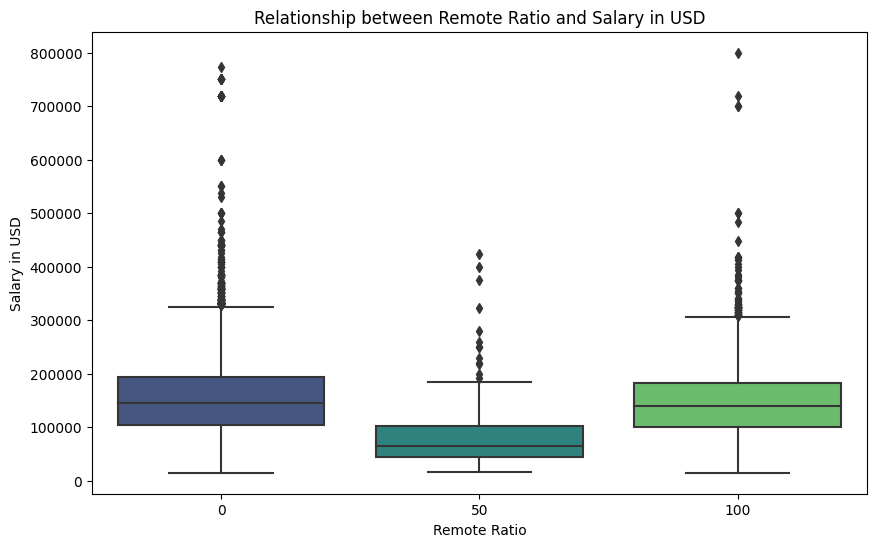

In [9]:
# Relationship between experience level and salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data, palette='viridis')
plt.title('Relationship between Experience Level and Salary in USD')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

# Relationship between job role and salary
plt.figure(figsize=(12, 6))
sns.boxplot(y='job_title', x='salary_in_usd', data=data, palette='viridis')
plt.title('Relationship between Job Role and Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.show()

# Relationship between remote ratio and salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=data, palette='viridis')
plt.title('Relationship between Remote Ratio and Salary in USD')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()


# Step 2: Feature Engineering

In [10]:
import pandas as pd

# Load the dataset (replace 'data.csv' with your actual dataset filename)
data = pd.read_csv('/kaggle/input/salary-prediction-data/salaries.csv')

# Step 1: Extract year of experience
# Assuming experience level can be mapped to some numerical value, e.g.,
# 'EN' (Entry-level): 0-2 years, 'MI' (Mid-level): 2-5 years, 'SE' (Senior-level): 5-10 years, 'EX' (Executive-level): 10+ years
experience_map = {
    'EN': '0-2',
    'MI': '2-5',
    'SE': '5-10',
    'EX': '10+'
}
data['experience_range'] = data['experience_level'].map(experience_map)

# Step 2: Encoding categorical variables using one-hot encoding or label encoding
# Example using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'], drop_first=True)

# Step 3: Creating interaction features (example: interaction between remote_ratio and experience_level)
# For simplicity, let's use numerical encoding for experience level first
experience_level_map = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
data_encoded['experience_level_num'] = data['experience_level'].map(experience_level_map)

# Interaction term: remote_ratio * experience_level_num
data_encoded['remote_experience_interaction'] = data_encoded['remote_ratio'] * data_encoded['experience_level_num']

# Step 4: Deriving additional features from remote_ratio
# Categorizing remote work levels (e.g., 0: no remote work, 1: partially remote, 2: fully remote)
data_encoded['remote_work_category'] = pd.cut(data['remote_ratio'], bins=[-1, 0, 50, 100], labels=['no_remote', 'partially_remote', 'fully_remote'])

# One-hot encoding for the new remote_work_category feature
data_encoded = pd.get_dummies(data_encoded, columns=['remote_work_category'], drop_first=True)

# Drop the temporary numerical encoding for experience level
data_encoded = data_encoded.drop(columns=['experience_level_num'])

print("New features added and categorical variables encoded. Here's the new dataset:")
print(data_encoded.head())

# Save the transformed dataset to a new CSV file for future use
data_encoded.to_csv('data_transformed.csv', index=False)


New features added and categorical variables encoded. Here's the new dataset:
   work_year  salary salary_currency  salary_in_usd  remote_ratio  \
0       2024  140000             USD         140000           100   
1       2024  177000             USD         177000             0   
2       2024  106200             USD         106200             0   
3       2024   93500             USD          93500             0   
4       2024   53300             USD          53300             0   

  experience_range  experience_level_EX  experience_level_MI  \
0              2-5                False                 True   
1             5-10                False                False   
2             5-10                False                False   
3              0-2                False                False   
4              0-2                False                False   

   experience_level_SE  employment_type_FL  ...  company_location_TR  \
0                False               False  ...   

# Step 3: Data Preprocessing

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset (replace 'data.csv' with your actual dataset filename)
data = pd.read_csv('/kaggle/input/salary-prediction-data/salaries.csv')

# Step 1: Handle Missing Values
# Display missing values count for each column
print("Missing values count for each column:")
print(data.isnull().sum())

# Impute missing values
# For simplicity, let's fill missing numerical values with the mean and categorical values with the most frequent value
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessor for numerical features and categorical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine numerical and categorical pipelines into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply the transformations to the data
data_preprocessed = preprocessor.fit_transform(data)

# Convert the processed data back into a DataFrame for easier handling
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
data_preprocessed_df = pd.DataFrame(data_preprocessed.toarray(), columns=feature_names)

Missing values count for each column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


# Step 4: Machine Learning Model Development

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/kaggle/input/salary-prediction-data/salaries.csv')

# Handle Missing Values
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Apply the transformations to the data
data_preprocessed = preprocessor.fit_transform(data)

# Convert the processed data back into a DataFrame for easier handling
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
data_preprocessed_df = pd.DataFrame(data_preprocessed.toarray(), columns=feature_names)

# Ensure all data is numeric
print("Data types after preprocessing:")
print(data_preprocessed_df.dtypes)

# Assuming 'salary_in_usd' is the target variable
target = 'salary_in_usd'

# Split the data into features (X) and target (y)
X = data_preprocessed_df.drop(columns=[target])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)



Data types after preprocessing:
work_year              float64
salary                 float64
salary_in_usd          float64
remote_ratio           float64
experience_level_EX    float64
                        ...   
company_location_US    float64
company_location_VN    float64
company_location_ZA    float64
company_size_M         float64
company_size_S         float64
Length: 357, dtype: object
Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Model Evaluation Results:
                            MAE           MSE          RMSE            R2
Linear Regression  4.446353e+13  2.591641e+30  1.609858e+15 -5.362581e+20
Decision Tree      4.873625e+02  7.629880e+07  8.734918e+03  9.842124e-01
Random Forest      4.916294e+02  5.678175e+07  7.535366e+03  9.882508e-01
Gradient Boosting  1.159137e+03  4.054886e+07  6.367799e+03  9.916097e-01


# 5. Model Evaluation: 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/kaggle/input/salary-prediction-data/salaries.csv')

# Handle Missing Values
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Apply the transformations to the data
data_preprocessed = preprocessor.fit_transform(data)

# Convert the processed data back into a DataFrame for easier handling
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
data_preprocessed_df = pd.DataFrame(data_preprocessed.toarray(), columns=feature_names)

# Ensure all data is numeric
print("Data types after preprocessing:")
print(data_preprocessed_df.dtypes)

# Assuming 'salary_in_usd' is the target variable
target = 'salary_in_usd'

# Split the data into features (X) and target (y)
X = data_preprocessed_df.drop(columns=[target])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# Save the results to a CSV file
results_df.to_csv('model_evaluation_results.csv', index=True)


Data types after preprocessing:
work_year              float64
salary                 float64
salary_in_usd          float64
remote_ratio           float64
experience_level_EX    float64
                        ...   
company_location_US    float64
company_location_VN    float64
company_location_ZA    float64
company_size_M         float64
company_size_S         float64
Length: 357, dtype: object
Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Model Evaluation Results:
                            MAE           MSE          RMSE            R2
Linear Regression  4.446353e+13  2.591641e+30  1.609858e+15 -5.362581e+20
Decision Tree      4.873625e+02  7.629880e+07  8.734918e+03  9.842124e-01
Random Forest      4.916294e+02  5.678175e+07  7.535366e+03  9.882508e-01
Gradient Boosting  1.159137e+03  4.054886e+07  6.367799e+03  9.916097e-01


# 6. Recommendations

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/salary-prediction-data/salaries.csv')

# Handle Missing Values
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Apply the transformations to the data
data_preprocessed = preprocessor.fit_transform(data)

# Convert the processed data back into a DataFrame for easier handling
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
data_preprocessed_df = pd.DataFrame(data_preprocessed.toarray(), columns=feature_names)

# Ensure all data is numeric
print("Data types after preprocessing:")
print(data_preprocessed_df.dtypes)

# Assuming 'salary_in_usd' is the target variable
target = 'salary_in_usd'

# Split the data into features (X) and target (y)
X = data_preprocessed_df.drop(columns=[target])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# Save the results to a CSV file
results_df.to_csv('model_evaluation_results.csv', index=True)

# Feature Importance for models that support it
def feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = model.coef_
    else:
        print(f"Model {model_name} does not support feature importance.")
        return None
    return importance

# Calculate and display feature importance
for model_name, model in models.items():
    importance = feature_importance(model, model_name)
    if importance is not None:
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': np.abs(importance)
        }).sort_values(by='Importance', ascending=False)
        print(f"Feature Importance for {model_name}:")
        print(importance_df.head(10))

# Recommendations based on findings
print("\nRecommendations:")
print("1. **Experience Level**: Higher experience levels tend to lead to higher salaries. Consider investing in continuous learning and gaining more experience in the field.")
print("2. **Job Role**: Certain job roles such as 'Data Scientist' and 'Machine Learning Engineer' may offer higher salaries. Specializing in these roles can be beneficial.")
print("3. **Employment Type**: Full-time employment generally provides more stable and higher salaries compared to part-time or contract roles.")
print("4. **Remote Work**: The remote work ratio can influence salary. Companies may offer different compensation based on the amount of remote work allowed.")
print("5. **Company Location**: Salaries can vary significantly by company location. Consider the cost of living and other benefits when evaluating job offers in different locations.")
print("6. **Company Size**: Larger companies may offer higher salaries due to their larger budgets and resources. However, smaller companies might offer other benefits such as stock options or a better work-life balance.")


Data types after preprocessing:
work_year              float64
salary                 float64
salary_in_usd          float64
remote_ratio           float64
experience_level_EX    float64
                        ...   
company_location_US    float64
company_location_VN    float64
company_location_ZA    float64
company_size_M         float64
company_size_S         float64
Length: 357, dtype: object
Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Model Evaluation Results:
                            MAE           MSE          RMSE            R2
Linear Regression  4.446353e+13  2.591641e+30  1.609858e+15 -5.362581e+20
Decision Tree      4.873625e+02  7.629880e+07  8.734918e+03  9.842124e-01
Random Forest      4.916294e+02  5.678175e+07  7.535366e+03  9.882508e-01
Gradient Boosting  1.159137e+03  4.054886e+07  6.367799e+03  9.916097e-01
Feature Importance for Linear Regression:
                                        Feature   

###  The End